# ExMAS Transitize

### Illustration and results

1. parameters for expiermental setting
2. system-wide KPIs
3. illustrative example
----


### Parameters and settings



In [1]:
%load_ext autoreload
%autoreload 2
import os
import seaborn as sns
os.chdir(os.path.join(os.getcwd(),'../../..'))
import ExMAS.main
from ExMAS.utils import *
from ExMAS.transitize import visualizations
params = ExMAS.utils.get_config('ExMAS/data/configs/transit.json')  
inData = ExMAS.utils.load_G(inData, params, stats=True)

In [2]:
params.nP = 600  # number of trips
params.simTime = 0.2  # per simTime hours
params.mode_choice_beta = -0.3  # only to estimate utilities of pickup points

params.VoT = 0.0035  # value of time (eur/second)
params.VoT_std = params.VoT / 8  # variance of Value of Time

params.speeds.walk = 1.2  # speed of walking (m/s)
params.speeds.ride = 7 # in-vehicle speed

params.walk_discomfort = 1  # walking discomfort factor (to be made 1.5 or 2.0 later)
params.walk_threshold = 400  # maximal walking distance (per origin or destination)

params.price = 1.5  # per kilometer fare (eur)
params.shared_discount = 0.25 # discount for door to door pooling (1.2eur)
params.s2s_discount = 0.66  # discount for stop to stop pooling (50c)
params.multistop_discount = 0.8  # discount for multi-stop (30c)

params.multi_stop_WtS = 1  # willingness to share in multi-stop pooling (now lower)

---
### Results (KPI)

In [19]:
inData = visualizations.prep_results(PATH='ams', inData = inData)
inData = visualizations.make_report(inData)

In [22]:
report = inData.transitize.report
report.columns = ['private','door-to-door pooled','stop-to-stop pooled','multi-stop pooled']
compos = report.loc[['p','d2d','s2s','ms']].fillna(0).astype(int).T
compos.columns = ['private','door-to-door pooled','stop-to-stop pooled','multi-stop pooled']
compos.index.name = 'solution'
compos.style.set_caption("Rides composition")

,private,door-to-door pooled,stop-to-stop pooled,multi-stop pooled
solution,,,,
private,500,0,0,0
door-to-door pooled,93,164,0,0
stop-to-stop pooled,95,153,10,0
multi-stop pooled,94,150,2,7


In [24]:
KPIs = report.loc[['u_veh','u_pax','ttrav','orig_walk_time','dest_walk_time', 'nRides']].fillna(0).astype(int).T
KPIs.columns = ['vehicle hours','travellers costs (utility)','passenger in-vehicle hours','walk time origin', 'walk time destination', 'feasible rides']
KPIs.index.name = 'solution'
KPIs.style.set_caption("KPIs")

,vehicle hours,travellers costs (utility),passenger in-vehicle hours,walk time origin,walk time destination,feasible rides
solution,,,,,,
private,321496,4980,321496,0,0,500
door-to-door pooled,217366,4771,410369,0,0,8281
stop-to-stop pooled,216778,4739,403717,4865,4340,8331
multi-stop pooled,215558,4652,399672,7486,5727,10759


# Illustrative multi-stop ride

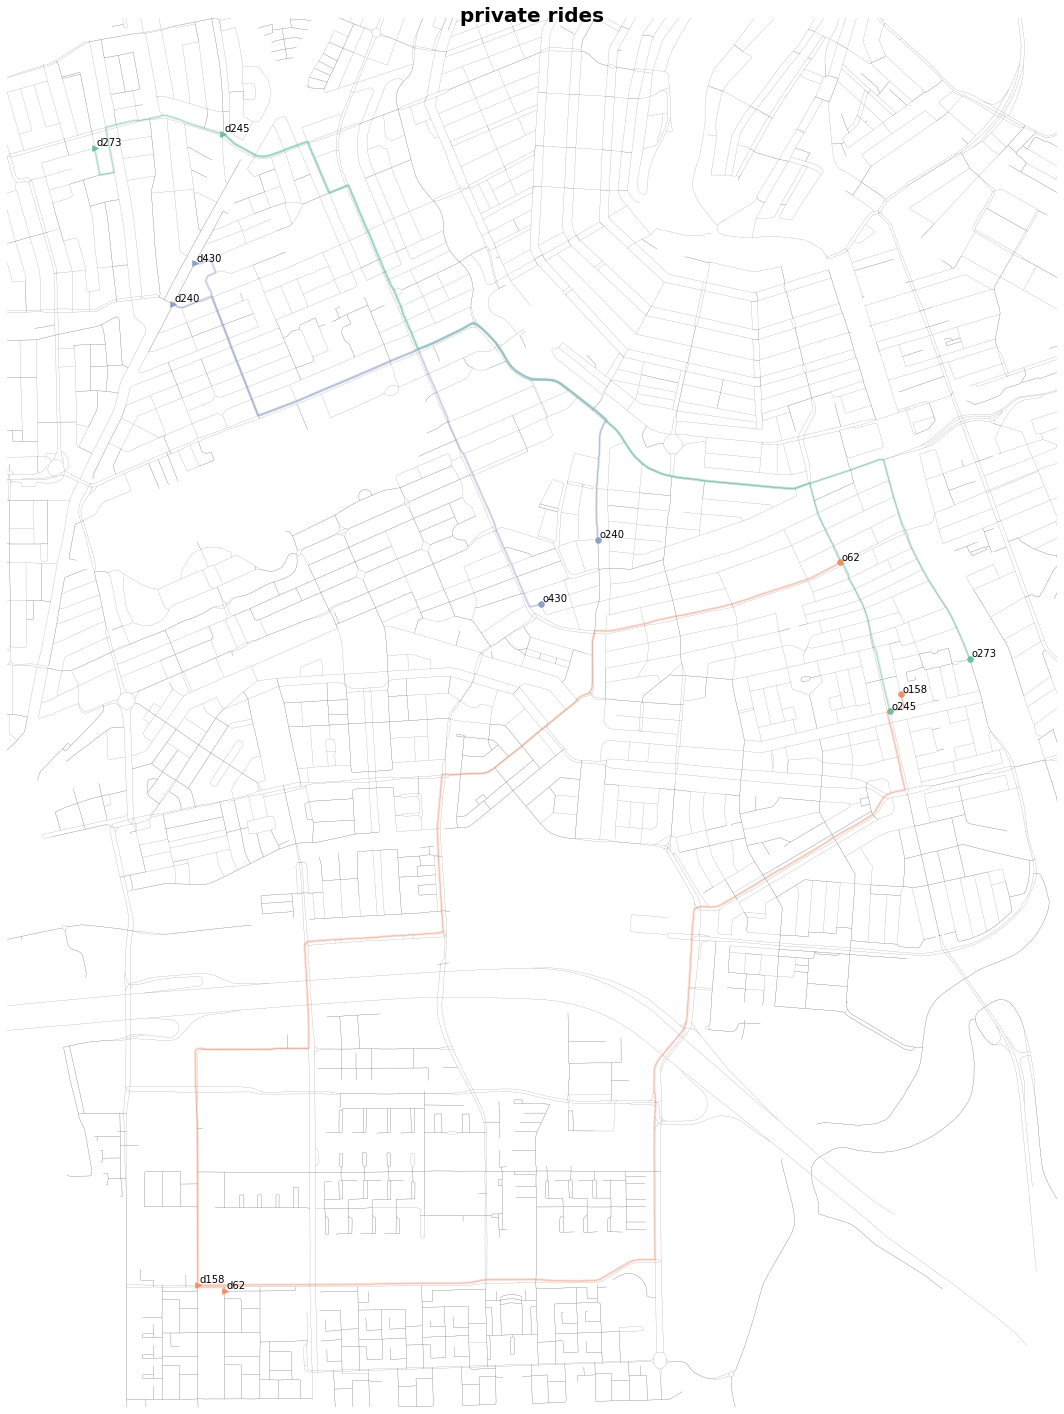

In [6]:
ride_index = 9149
visualizations.plot_ms(inData, ride_index, level = 0, title = 'private rides')

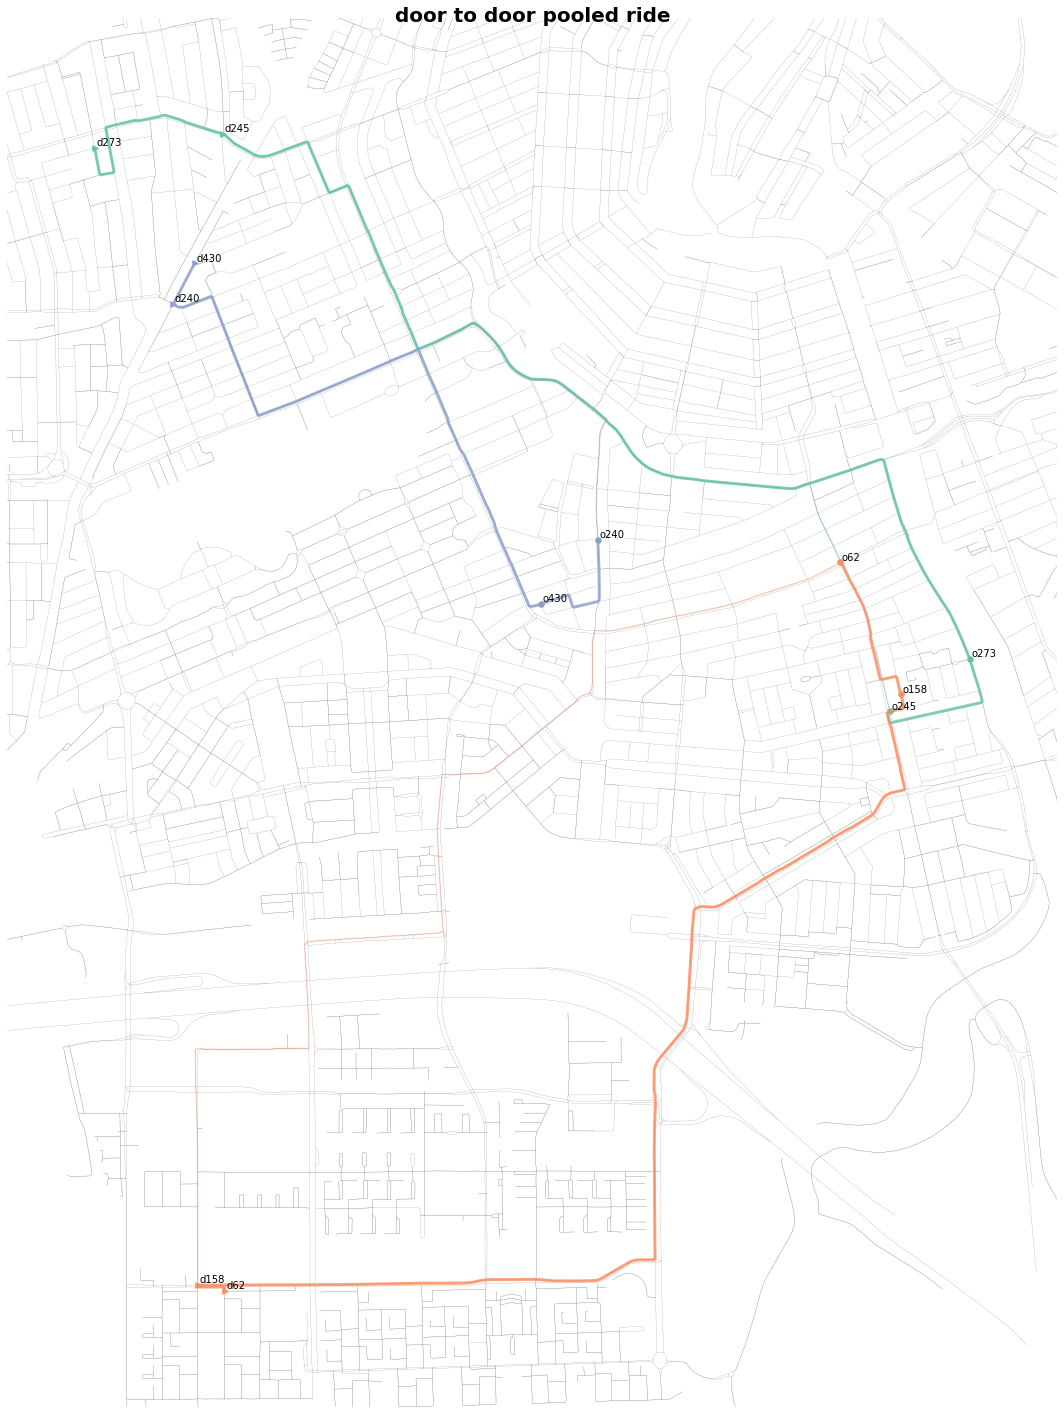

In [7]:
visualizations.plot_ms(inData, ride_index, level = 1, title = 'door to door pooled ride')

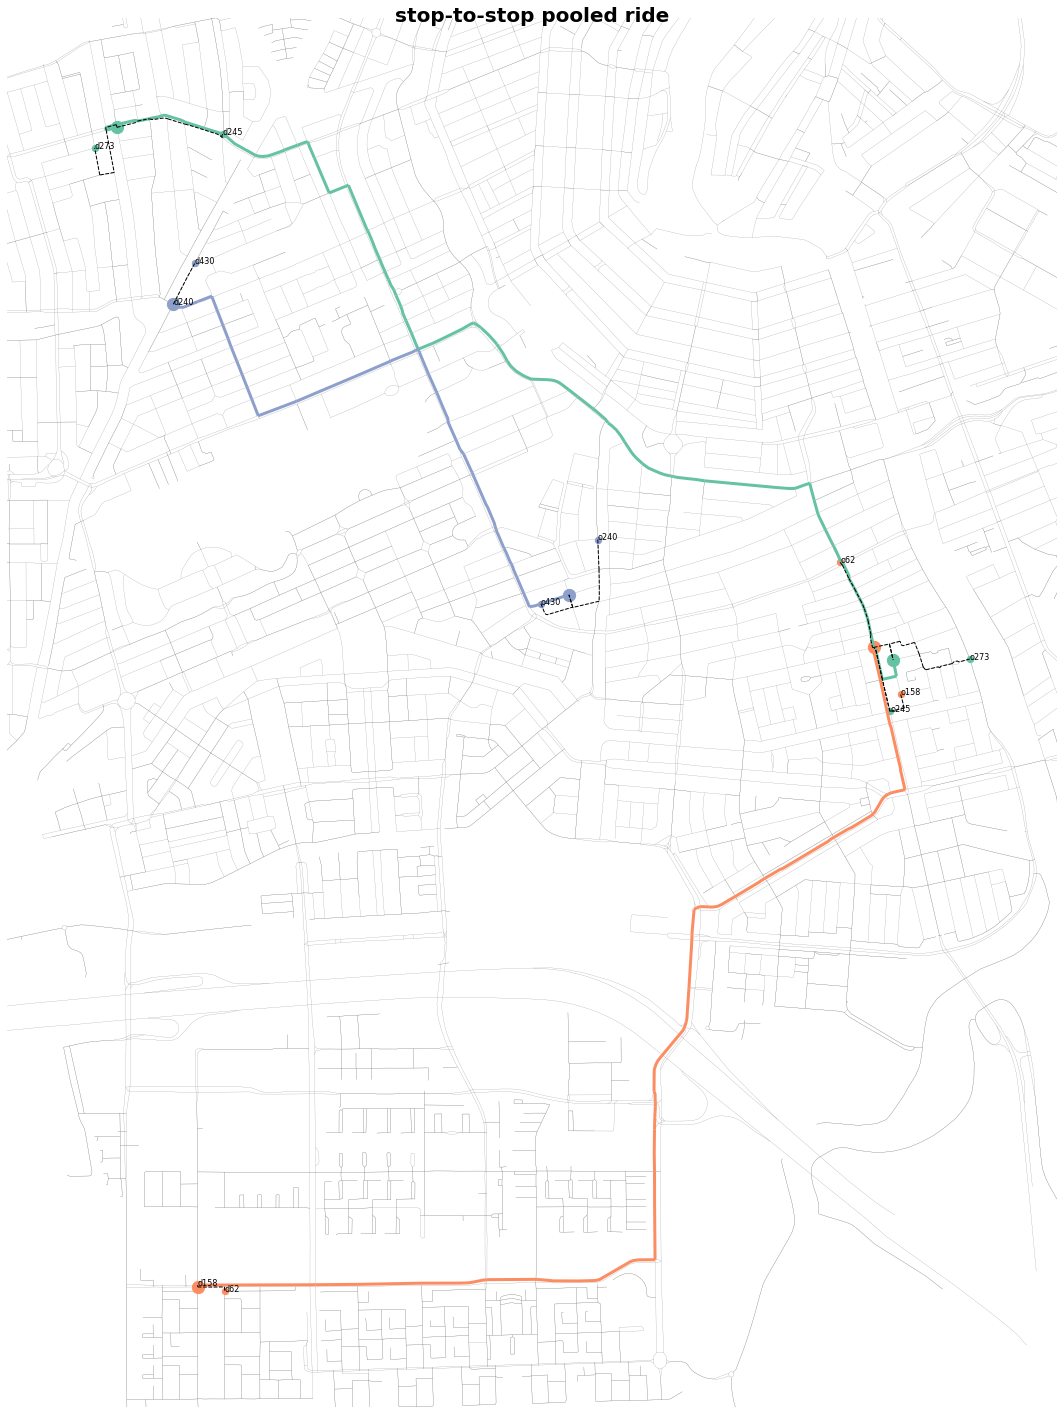

In [8]:
visualizations.plot_ms(inData, ride_index, level = 2, title = 'stop-to-stop pooled ride')

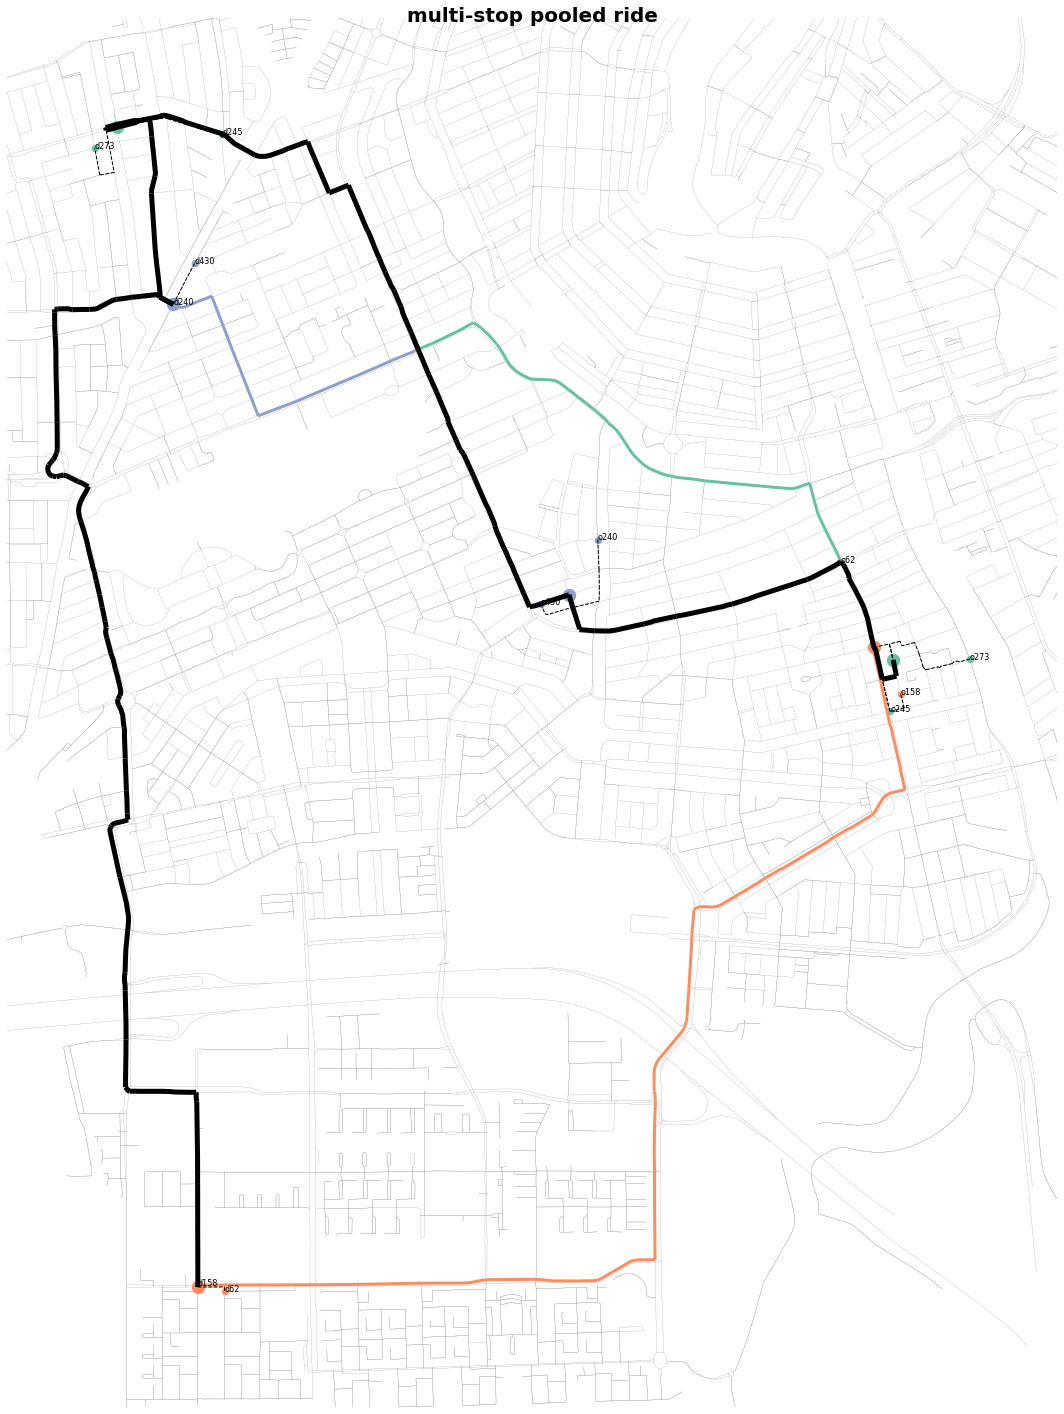

In [9]:
visualizations.plot_ms(inData, ride_index, level = 3, title = 'multi-stop pooled ride')

### Data on rides

In [10]:
ride_index = 9149
rides = inData.transitize.rides
requests = inData.transitize.requests

ride = inData.transitize.rides.loc[ride_index]
try:
    ride['high_level_indexes'] = json.loads(ride['high_level_indexes'])
except:
    pass
ride['origins'] = requests.loc[ride.indexes].origin.values
ride['destinations'] = requests.loc[ride.indexes].destination.values

private_rides = rides[rides.kind=='p'][rides['index'].isin(ride.indexes)]

s2s_rides = rides.loc[ride.high_level_indexes]

d2d_rides = rides.loc[s2s_rides.d2d_reference.values]

In [11]:
private_rides.style.set_caption("Private rides")

,level_0,index,indexes,indexes_orig,indexes_dest,u_pax,u_veh,kind,ttrav,orig_walk_time,dest_walk_time,solution_0,solution_1,low_level_indexes_set,origin,destination,d2d_reference,solution_2,high_level_indexes,solution_3
62,62,62.000000,[62],[62],[62],9.923126,664.000000,p,664.000000,0.000000,0.000000,1,0,nan,nan,nan,nan,0,nan,0
158,158,158.000000,[158],[158],[158],9.899972,614.000000,p,614.000000,0.000000,0.000000,1,0,nan,nan,nan,nan,0,nan,0
240,240,240.000000,[240],[240],[240],5.666961,361.000000,p,361.000000,0.000000,0.000000,1,0,nan,nan,nan,nan,0,nan,0
245,245,245.000000,[245],[245],[245],8.830251,547.000000,p,547.000000,0.000000,0.000000,1,0,nan,nan,nan,nan,0,nan,0
273,273,273.000000,[273],[273],[273],10.626044,683.000000,p,683.000000,0.000000,0.000000,1,0,nan,nan,nan,nan,0,nan,0
430,430,430.000000,[430],[430],[430],5.388863,341.000000,p,341.000000,0.000000,0.000000,1,0,nan,nan,nan,nan,0,nan,0


In [12]:
d2d_rides.style.set_caption("Door-to-door rides")

,level_0,index,indexes,indexes_orig,indexes_dest,u_pax,u_veh,kind,ttrav,orig_walk_time,dest_walk_time,solution_0,solution_1,low_level_indexes_set,origin,destination,d2d_reference,solution_2,high_level_indexes,solution_3
2124.0,2124,2124.000000,"[245, 273]","[245, 273]","[245, 273]",18.217090,762.000000,d2d,1336.000000,0.000000,0.000000,0,0,nan,nan,nan,nan,0,nan,0
3286.0,3286,3286.000000,"[62, 158]","[62, 158]","[158, 62]",18.052043,714.000000,d2d,1345.000000,0.000000,0.000000,0,0,nan,nan,nan,nan,0,nan,0
2107.0,2107,2107.000000,"[240, 430]","[240, 430]","[240, 430]",10.968870,421.000000,d2d,751.000000,0.000000,0.000000,0,1,nan,nan,nan,nan,1,nan,0


In [13]:
s2s_rides.style.set_caption("Stop-to-stop rides")

,level_0,index,indexes,indexes_orig,indexes_dest,u_pax,u_veh,kind,ttrav,orig_walk_time,dest_walk_time,solution_0,solution_1,low_level_indexes_set,origin,destination,d2d_reference,solution_2,high_level_indexes,solution_3
8297,8297,2124.000000,"[245, 273]",nan,nan,17.201110,670.000000,s2s,670.000000,538.000000,746.000000,0,0,"{273, 245}",46296816.000000,46384225.000000,2124.000000,1,nan,0
8309,8309,3286.000000,"[62, 158]",nan,nan,14.610193,727.000000,s2s,727.000000,557.000000,111.000000,0,0,"{158, 62}",7026677595.000000,46190434.000000,3286.000000,0,nan,0
8296,8296,2107.000000,"[240, 430]",nan,nan,9.508813,438.000000,s2s,438.000000,371.000000,159.000000,0,0,"{240, 430}",46307158.000000,6960846027.000000,2107.000000,0,nan,0


In [14]:
ride.to_frame().T.style.set_caption("Multi-stop ride")

,level_0,index,indexes,indexes_orig,indexes_dest,u_pax,u_veh,kind,ttrav,orig_walk_time,dest_walk_time,solution_0,solution_1,low_level_indexes_set,origin,destination,d2d_reference,solution_2,high_level_indexes,solution_3,origins,destinations
9149,818,nan,"[245, 273, 62, 158, 240, 430]","[8297, 8309, 8296]","[8297, 8296, 8309]",21.843824,1415.000000,ms,1835.000000,1466.000000,1016.000000,0,0,nan,nan,nan,nan,0,"[8297, 8309, 8296]",1,[ 295677789 46296981 6932947315 46291028 46316327 46305753],[ 297095265 46380540 46189775 4623486333 6960846027 46360198]


---
(c) Rafal Kucharski, TU Delft, 2021